In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'sans-serif'

print("✓ Libraries loaded")

✓ Libraries loaded


In [ ]:
bundles = pd.read_csv('../outputs/results/final_bundles_for_poster.csv')

print(f"Loaded {len(bundles)} curated bundles")
print(f"\nLift range: {bundles['lift'].min():.2f} - {bundles['lift'].max():.2f}")
print(f"Categories: {bundles['category'].nunique()}")
print(f"Cross-category bundles: {(~bundles['is_matching_set']).sum()}")

import matplotlib.cm as cm
unique_categories = bundles['category'].unique()
colors_list = cm.tab20(np.linspace(0, 1, len(unique_categories)))
category_colors = {cat: colors_list[i] for i, cat in enumerate(unique_categories)}

print(f"\nGenerated colors for {len(category_colors)} categories")

bundles.head()

Loaded 10 curated bundles

Lift range: 8.78 - 18.40
Categories: 9
Cross-category bundles: 3

Generated colors for 9 categories


,bundle_name,category,antecedents,consequents,support,confidence,lift,is_matching_set
0,Decorative Cushion Set,Home Textiles,FELTCRAFT CUSHION RABBIT,FELTCRAFT CUSHION OWL,0.016692,0.573664,18.396318,True
1,Elegant Tea Set,Tea & Dining,GREEN REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER,0.029514,0.634067,17.972045,True
2,Gift Set,Other,BLUE HARMONICA IN BOX,RED HARMONICA IN BOX,0.015099,0.485958,15.322806,True
3,Kids Lunch Duo,Kids Lunch,DOLLY GIRL LUNCH BOX,SPACEBOY LUNCH BOX,0.024545,0.596313,14.984576,True
4,Matching Alarm Clocks,Clocks,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED,0.028111,0.656915,14.382290,True


✓ Saved: bundle_lift_chart.pdf


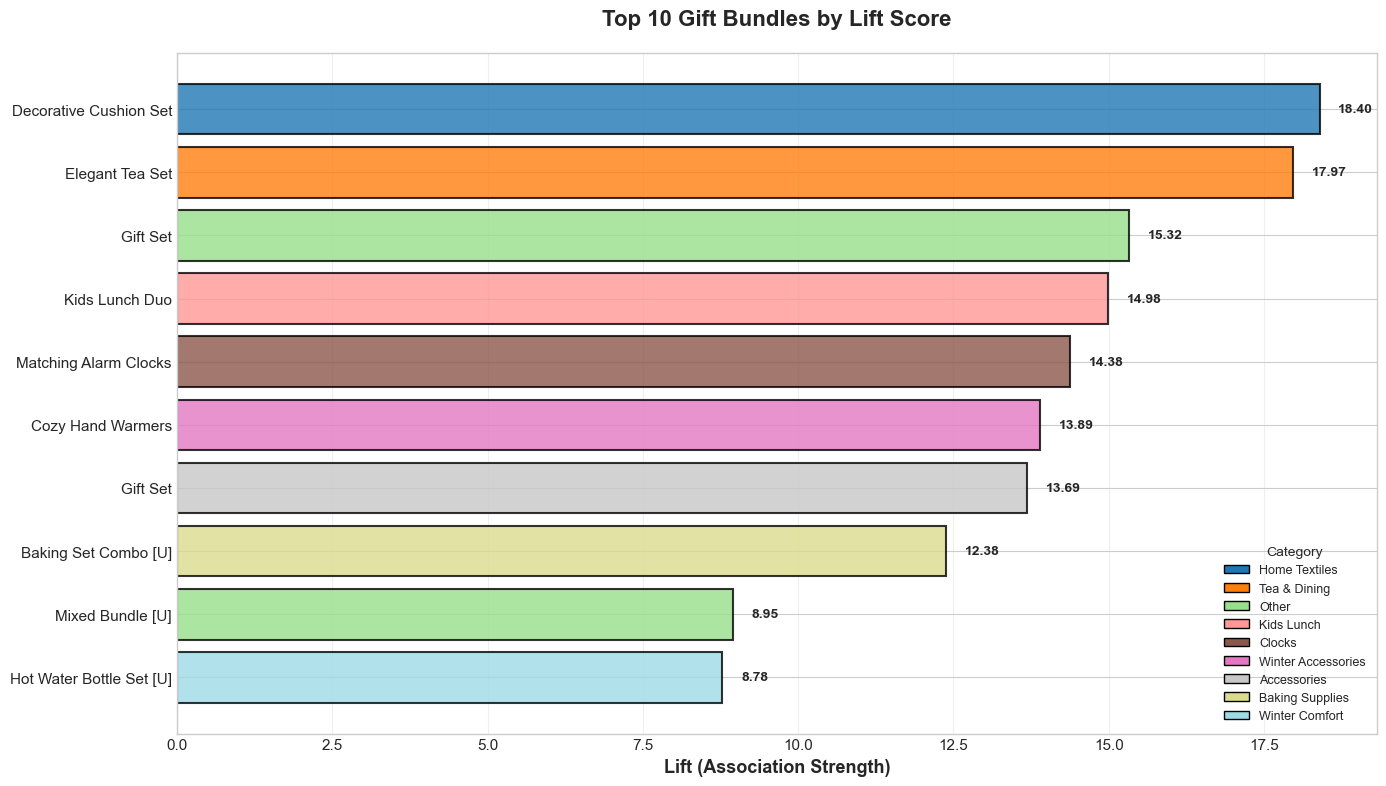

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

colors = [category_colors[cat] for cat in bundles['category']]
bars = ax.barh(range(len(bundles)), bundles['lift'].values, 
               color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)

labels = []
for idx, row in bundles.iterrows():
    label = row['bundle_name']
    if not row['is_matching_set']:
        label += " [U]"
    labels.append(label)

ax.set_yticks(range(len(bundles)))
ax.set_yticklabels(labels, fontsize=11)
ax.invert_yaxis()

# Add lift values on bars
for i, (lift, bar) in enumerate(zip(bundles['lift'].values, bars)):
    ax.text(lift + 0.3, i, f'{lift:.2f}', 
            va='center', fontsize=10, fontweight='bold')

ax.set_xlabel('Lift (Association Strength)', fontsize=13, fontweight='bold')
ax.set_title('Top 10 Gift Bundles by Lift Score', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

# Legend
legend_elements = [Patch(facecolor=color, edgecolor='black', label=cat) 
                   for cat, color in category_colors.items()]
ax.legend(handles=legend_elements, loc='lower right', fontsize=9, 
          title='Category', title_fontsize=10)

plt.tight_layout()
plt.savefig('../outputs/visualizations/bundle_lift_chart.pdf', bbox_inches='tight', dpi=300)
plt.savefig('../outputs/visualizations/bundle_lift_chart.png', bbox_inches='tight', dpi=300)
print("✓ Saved: bundle_lift_chart.pdf")
plt.show()

✓ Saved: lift_distribution.pdf


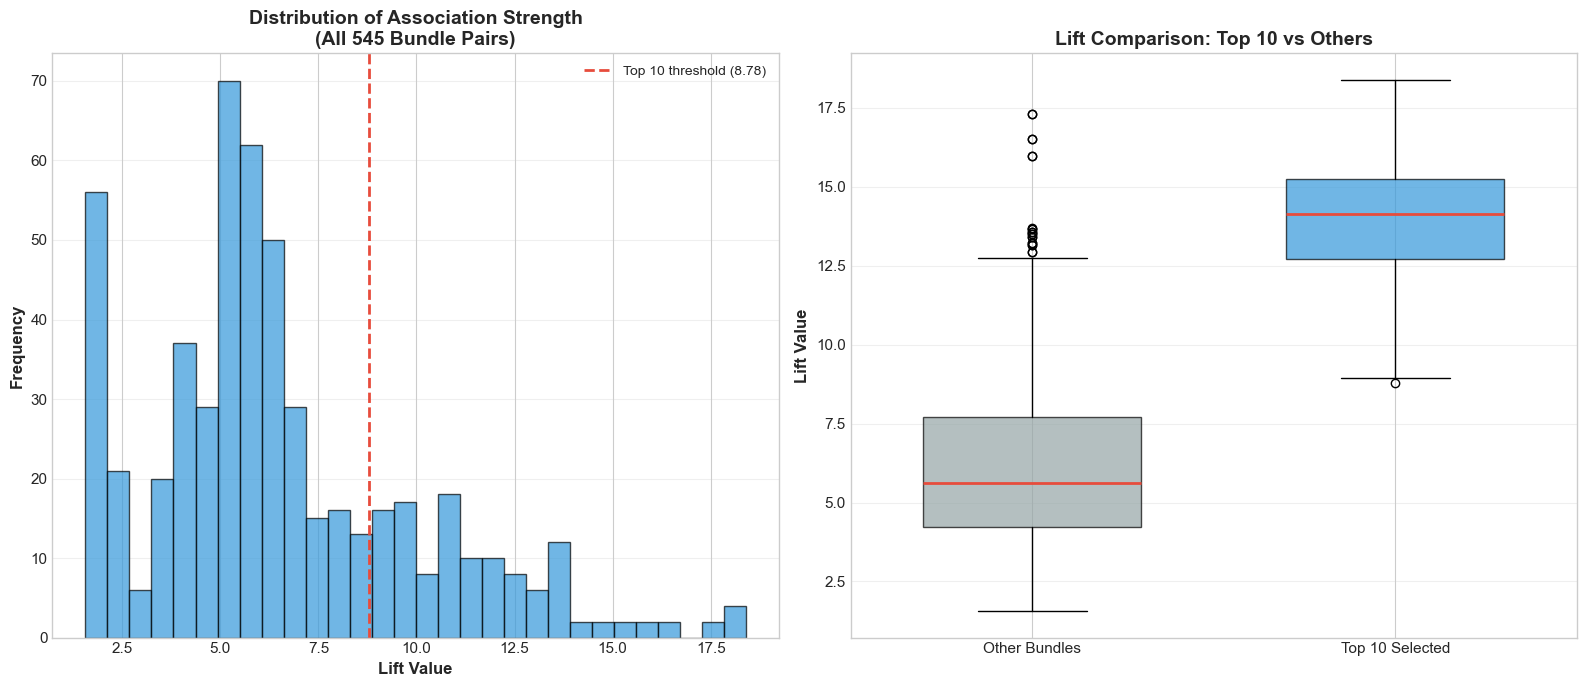

In [ ]:
# Load all pairs for comparison
all_pairs = pd.read_csv('../outputs/results/strong_pairs.csv')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Histogram showing all pairs
ax1.hist(all_pairs['lift'], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
ax1.axvline(bundles['lift'].min(), color='#e74c3c', linestyle='--', 
            linewidth=2, label=f'Top 10 threshold ({bundles["lift"].min():.2f})')
ax1.set_xlabel('Lift Value', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title(f'Distribution of Association Strength\n(All {len(all_pairs)} Bundle Pairs)', 
              fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(axis='y', alpha=0.3)

top_10_lifts = bundles['lift'].values
rest_lifts = all_pairs[~all_pairs['lift'].isin(bundles['lift'])]['lift'].values

bp = ax2.boxplot([rest_lifts, top_10_lifts], 
                 tick_labels=['Other Bundles', 'Top 10 Selected'], 
                 patch_artist=True, widths=0.6,
                 boxprops=dict(facecolor='#95a5a6', alpha=0.7),
                 medianprops=dict(color='#e74c3c', linewidth=2))

bp['boxes'][1].set_facecolor('#3498db')
ax2.set_ylabel('Lift Value', fontsize=12, fontweight='bold')
ax2.set_title('Lift Comparison: Top 10 vs Others', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

ax2.text(0.5, 0.02, 'Circles = outliers (unusually high lift)\nRed line = median, Black line = mean', 
         transform=ax2.transAxes, fontsize=9, verticalalignment='bottom',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('../outputs/visualizations/lift_distribution.pdf', bbox_inches='tight', dpi=300)
plt.savefig('../outputs/visualizations/lift_distribution.png', bbox_inches='tight', dpi=300)
print("✓ Saved: lift_distribution.pdf")
plt.show()

✓ Saved: support_confidence_scatter.pdf


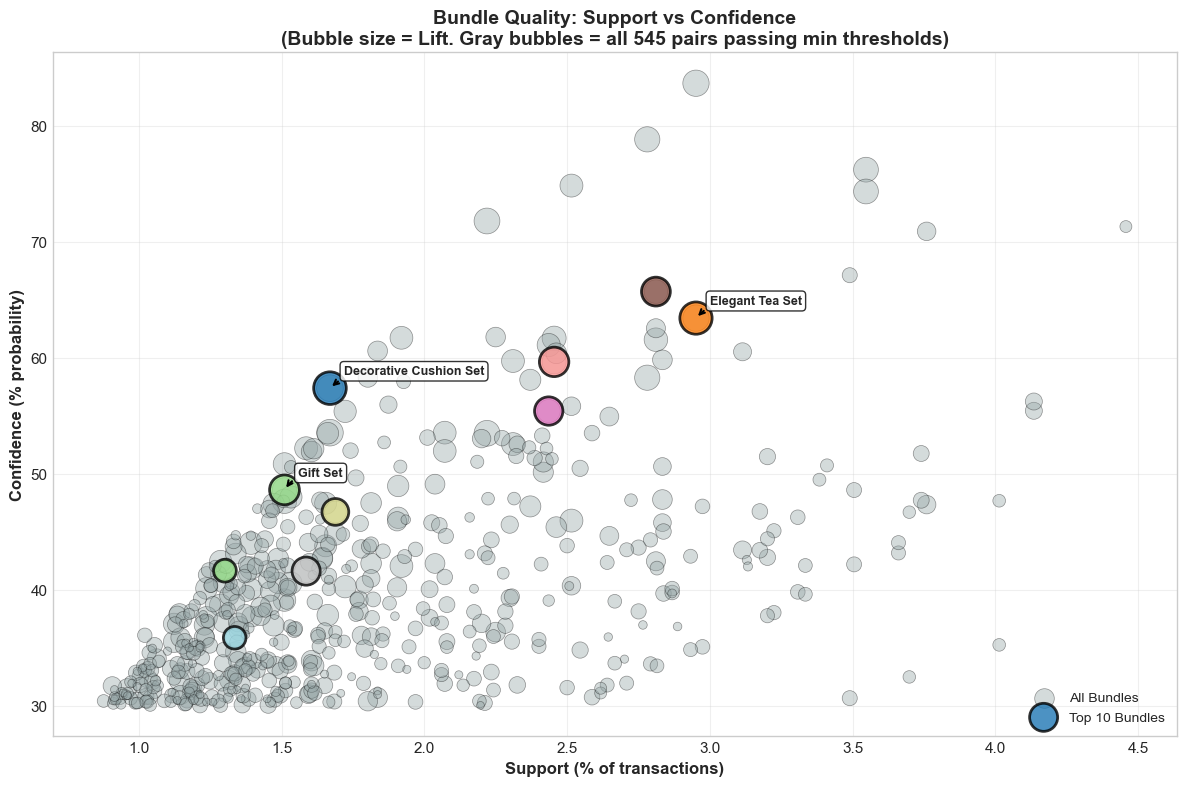

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(all_pairs['support']*100, all_pairs['confidence']*100, 
          s=all_pairs['lift']*20, alpha=0.4, color='#95a5a6', 
          edgecolors='black', linewidths=0.5, label='All Bundles')

# Top 10 highlighted
colors_scatter = [category_colors[cat] for cat in bundles['category']]
ax.scatter(bundles['support']*100, bundles['confidence']*100,
          s=bundles['lift']*30, alpha=0.8, c=colors_scatter,
          edgecolors='black', linewidths=2, label='Top 10 Bundles')

# Annotate top 3
for idx in range(min(3, len(bundles))):
    row = bundles.iloc[idx]
    ax.annotate(row['bundle_name'], 
               xy=(row['support']*100, row['confidence']*100),
               xytext=(10, 10), textcoords='offset points',
               fontsize=9, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8),
               arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3',
                             color='black', lw=1.5))

ax.set_xlabel('Support (% of transactions)', fontsize=12, fontweight='bold')
ax.set_ylabel('Confidence (% probability)', fontsize=12, fontweight='bold')
ax.set_title('Bundle Quality: Support vs Confidence\n(Bubble size = Lift. Gray bubbles = all 545 pairs passing min thresholds)', 
            fontsize=14, fontweight='bold')
ax.legend(fontsize=10, loc='lower right', labelspacing=1.5)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/visualizations/support_confidence_scatter.pdf', bbox_inches='tight', dpi=300)
plt.savefig('../outputs/visualizations/support_confidence_scatter.png', bbox_inches='tight', dpi=300)
print("✓ Saved: support_confidence_scatter.pdf")
plt.show()


✓ Saved: confidence_by_lift


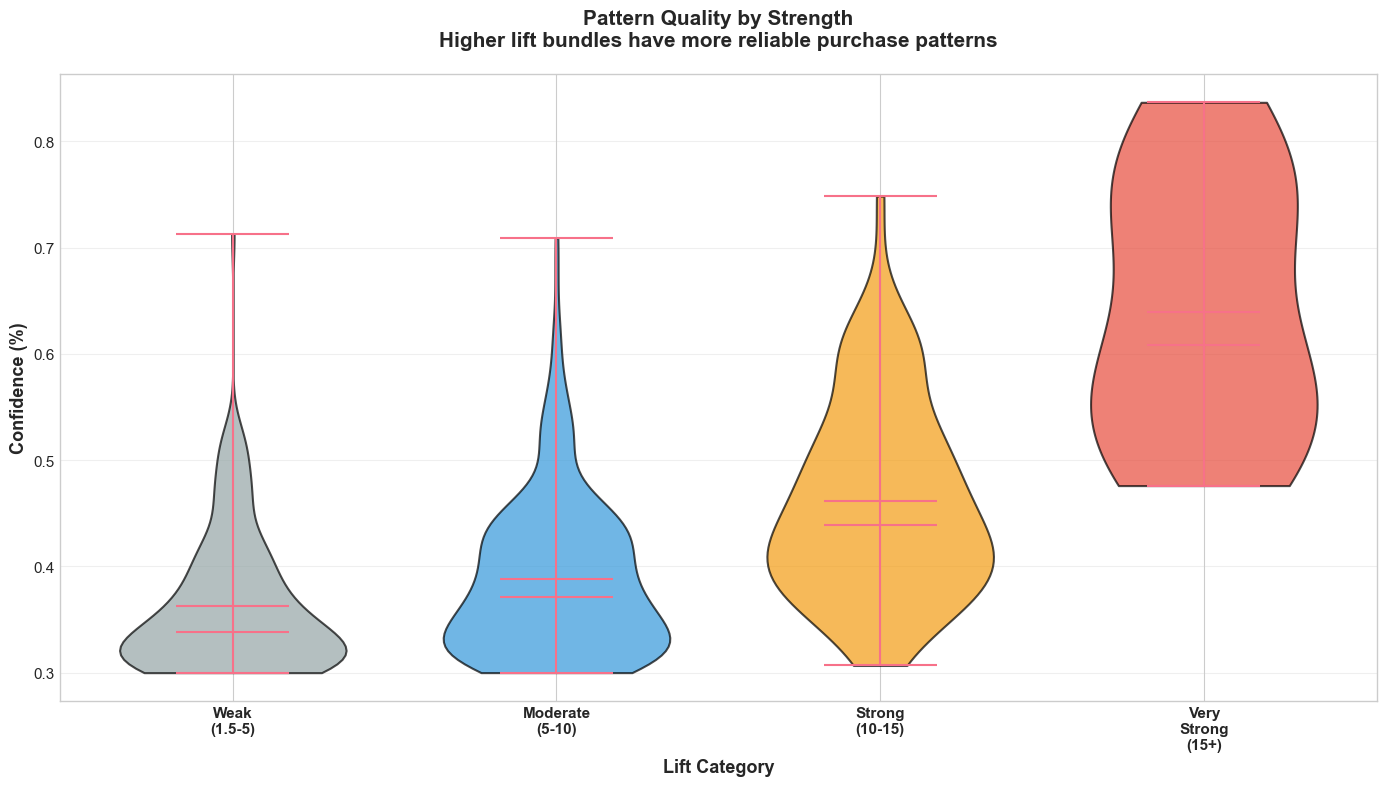

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

all_pairs_copy = all_pairs.copy()
all_pairs_copy['lift_category'] = pd.cut(all_pairs_copy['lift'], 
                                      bins=[0, 5, 10, 15, 20], 
                                      labels=['Weak (1.5-5)', 'Moderate (5-10)', 
                                             'Strong (10-15)', 'Very Strong (15+)'])

valid_categories = []
valid_data = []
category_labels = ['Weak (1.5-5)', 'Moderate (5-10)', 'Strong (10-15)', 'Very Strong (15+)']
for cat in category_labels:
    data = all_pairs_copy[all_pairs_copy['lift_category'] == cat]['confidence'].values
    if len(data) > 0:
        valid_categories.append(cat)
        valid_data.append(data)

if len(valid_data) > 0:
    parts = ax.violinplot(valid_data, positions=range(1, len(valid_data)+1), 
                         widths=0.7, showmeans=True, showmedians=True)

    colors_violin = ['#95a5a6', '#3498db', '#f39c12', '#e74c3c']
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(colors_violin[i % len(colors_violin)])
        pc.set_alpha(0.7)
        pc.set_edgecolor('black')
        pc.set_linewidth(1.5)
    
    ax.set_xticks(range(1, len(valid_data)+1))
    ax.set_xticklabels([cat.replace(' ', '\n') for cat in valid_categories], 
                       fontsize=11, fontweight='bold')
    ax.set_xlabel('Lift Category', fontsize=13, fontweight='bold')
    ax.set_ylabel('Confidence (%)', fontsize=13, fontweight='bold')
    ax.set_title('Pattern Quality by Strength\nHigher lift bundles have more reliable purchase patterns', 
                fontsize=15, fontweight='bold', pad=20)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/visualizations/confidence_by_lift.pdf', bbox_inches='tight', dpi=300)
plt.savefig('../outputs/visualizations/confidence_by_lift.png', bbox_inches='tight', dpi=300)
print("\n✓ Saved: confidence_by_lift")
plt.show()